# Decision Trees model

In [8]:
from utils import get_data

X_train, X_test, y_train, y_test, y = get_data()


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree

# Define column names for categorical and numeric columns
columns_to_drop = ['CustomerId']
categorical_columns = ['Gender', 'Geography']
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary']

# Create the column preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(categories='auto'), categorical_columns),
        ('std_scaler', StandardScaler(), numeric_columns)
    ])

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', tree.DecisionTreeClassifier())
])

# Fit the pipeline to the data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Gender', 'Geography']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('random_forest', DecisionTreeClassifier())])

In [10]:
# Classes
pipe[:-1].get_feature_names_out()

array(['ohe__Gender_Female', 'ohe__Gender_Male', 'ohe__Geography_France',
       'ohe__Geography_Germany', 'ohe__Geography_Spain',
       'std_scaler__CreditScore', 'std_scaler__Age', 'std_scaler__Tenure',
       'std_scaler__Balance', 'std_scaler__NumOfProducts',
       'std_scaler__HasCrCard', 'std_scaler__IsActiveMember',
       'std_scaler__EstimatedSalary'], dtype=object)

In [11]:
# Make predictions
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)

Accuracy:  0.7956191110976459
ROC AUC:  0.7013062922265566
Precision/Recall AUC:  0.7013062922265566
Confusion matrix:  [[22505  3518]
 [ 3228  3756]]


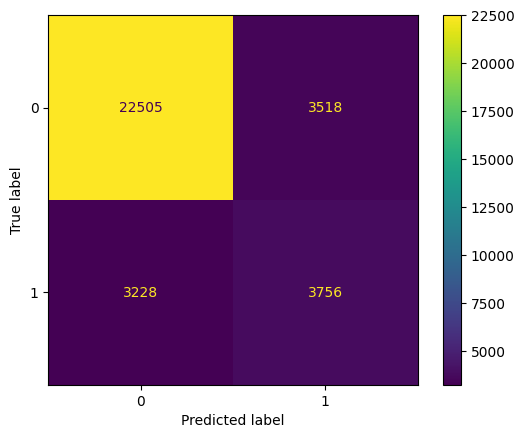

Done saving data!


In [12]:
import utils
import importlib
importlib.reload(utils)

utils.report_data('Random Forest', y, y_test, y_pred, y_pred_proba, pipe.classes_)